**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading data
books = pd.read_csv('books.csv', sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1,inplace=True)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [9]:
yearOfPublication = books['yearOfPublication'].unique()

In [10]:
len(yearOfPublication)

202

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [11]:
books.loc[books.yearOfPublication == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [12]:
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [13]:
# dropping the rows with the above mentioned indexes
books = books.drop([209538,221678,220731], axis=0)

### Change the datatype of yearOfPublication to 'int'

In [14]:
books.yearOfPublication = books.yearOfPublication.astype(int)

In [15]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [16]:
books.loc[books.publisher.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [17]:
books.dropna(subset=['publisher'],inplace=True)

## Exploring Users dataset

In [18]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [19]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [20]:
Age = users['Age'].unique()

In [21]:
len(Age)

166

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [22]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

### Replace null values in column `Age` with mean

In [23]:
users.Age = users.Age.fillna(users.Age.mean())

In [24]:
users['Age'].isnull().sum()

0

### Change the datatype of `Age` to `int`

In [25]:
# users['Age'] = users.Age.astype(int)
users.Age = users.Age.astype(int)

In [26]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [27]:
ratings.shape

(1149780, 3)

In [28]:
n_users = users.shape[0]
n_books = books.shape[0]

In [29]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [30]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [31]:
ratings_new.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [32]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [33]:
ratings_new.shape

(1031130, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [34]:
# explicit ratings represented by 1–10
ratings_explicit = ratings_new[ratings_new.bookRating !=0]
ratings_implicit = ratings_new[ratings_new.bookRating ==0]

### Find out which rating has been given highest number of times

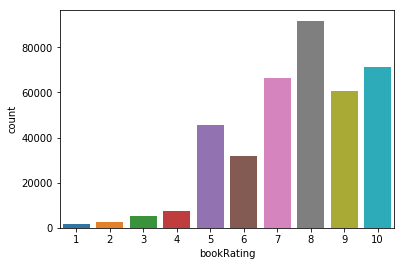

In [35]:
sns.countplot(data=ratings_explicit, x='bookRating')
plt.show()

# 8 is the rating given highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [36]:
counts1 = ratings_explicit['userID'].value_counts()

In [37]:
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]

In [38]:
counts = ratings_explicit['bookRating'].value_counts()

In [39]:
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [40]:
ratings_matrix = ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
R = ratings_matrix.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-0.016899  , -0.016899  , -0.016899  , ..., -0.016899  ,
        -0.016899  , -0.016899  ],
       [-0.01281319, -0.01281319, -0.01281319, ..., -0.01281319,
        -0.01281319, -0.01281319],
       [-0.02461996, -0.02461996, -0.02461996, ..., -0.02461996,
        -0.02461996, -0.02461996],
       ...,
       [-0.01804062, -0.01804062, -0.01804062, ..., -0.01804062,
        -0.01804062, -0.01804062],
       [-0.0185213 , -0.0185213 , -0.0185213 , ..., -0.0185213 ,
        -0.0185213 , -0.0185213 ],
       [-0.00962867, -0.00962867, -0.00962867, ..., -0.00962867,
        -0.00962867, -0.00962867]])

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [43]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
# k implies the principal components

In [44]:
U

array([[-0.02902178, -0.00073472, -0.00011362, ...,  0.0018783 ,
         0.001492  , -0.00125247],
       [-0.0045264 ,  0.00487334, -0.00636386, ..., -0.00062492,
         0.00121055, -0.00116675],
       [ 0.02024706,  0.00905327,  0.00271379, ..., -0.00294851,
         0.00075068, -0.00190178],
       ...,
       [ 0.01837919, -0.00235832,  0.01281994, ..., -0.00168794,
        -0.00140367, -0.00246455],
       [ 0.01362767, -0.00325413,  0.00700501, ..., -0.00144037,
        -0.0022359 , -0.00239181],
       [-0.00323466, -0.00658193,  0.00420112, ...,  0.00172145,
         0.00050484, -0.00074332]])

In [45]:
sigma

array([147.85406428, 149.03873604, 150.00542937, 152.11508432,
       152.86090591, 154.577847  , 154.73136341, 155.94010654,
       158.00953632, 159.20282665, 159.69203677, 161.70248304,
       162.65252849, 163.05501865, 165.93119223, 166.66652357,
       167.91825361, 170.51932114, 170.95306073, 172.95274052,
       173.77510684, 176.64996981, 178.02982499, 180.29330376,
       182.07325734, 183.90232841, 187.40100654, 189.42369442,
       190.70522784, 195.12547971, 198.00444269, 200.36773193,
       202.00827912, 203.42551365, 207.19628835, 209.88598921,
       212.68581391, 215.59150477, 220.67458007, 231.04636103,
       234.76022319, 244.27172613, 249.99796019, 255.2411884 ,
       263.58816449, 278.15145742, 291.33530188, 374.71881607,
       599.45284918, 651.92625064])

In [46]:
sigma_diag = np.diag(sigma)
sigma_diag

array([[147.85406428,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.03873604,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.00542937, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 374.71881607,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        599.45284918,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 651.92625064]])

In [47]:
Vt

array([[-4.11088177e-04, -1.10537122e-03, -7.88886140e-04, ...,
        -7.94644451e-05,  1.03374424e-03, -1.01652279e-03],
       [ 2.18228104e-04, -7.28776209e-05,  5.38931077e-05, ...,
         3.85228133e-04,  8.35453282e-04,  3.43477650e-04],
       [-5.90976180e-04, -1.20000793e-04, -1.20753953e-04, ...,
        -1.01572540e-04, -2.46995851e-04, -1.98449455e-03],
       ...,
       [-9.88898203e-04, -1.31624648e-03, -1.09019648e-03, ...,
        -6.65481275e-04, -7.09481007e-04, -6.80258053e-04],
       [ 1.76987233e-03,  1.91152272e-03,  1.81397398e-03, ...,
         1.63812163e-03,  1.65016005e-03,  1.64395173e-03],
       [-7.77689124e-04, -8.41277568e-04, -7.76505711e-04, ...,
        -6.58109448e-04, -6.80233509e-04, -7.50198948e-04]])

In [48]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma_diag), Vt) + user_ratings_mean.reshape(-1, 1)

In [49]:
preds_df = pd.DataFrame(all_user_predicted_ratings, index=ratings_matrix.index, columns = ratings_matrix.columns)
preds_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.026782,-0.002117,-0.000493,-0.002117,-0.002117,0.004030,-0.001473,0.006066,0.006066,0.012757,...,-0.000761,-0.002984,0.045408,-0.015242,-0.078286,0.004830,0.030557,0.000411,-0.006341,0.069061
2110,-0.007081,-0.003520,0.002556,-0.003520,-0.003520,0.015170,0.000451,-0.002330,-0.002330,0.014413,...,0.014090,0.014776,0.019194,0.004510,-0.019647,0.014777,0.015427,0.014296,0.014224,-0.007096
2276,-0.010854,-0.016486,-0.002251,-0.016486,-0.016486,0.032315,-0.017119,0.011673,0.011673,0.034113,...,0.025330,0.027419,0.067758,0.012525,0.133598,0.031094,0.025940,0.025626,0.034242,-0.048261
4017,-0.020304,0.035857,0.023889,0.035857,0.035857,0.028706,0.028975,-0.000805,-0.000805,0.066419,...,-0.000948,0.002945,0.087435,-0.008658,0.015234,0.025709,-0.000298,-0.000648,0.023094,-0.045901
4385,0.011244,-0.011626,0.012090,-0.011626,-0.011626,0.060196,-0.013531,-0.011274,-0.011274,0.050544,...,0.065934,0.069227,0.037958,0.030262,0.711175,0.058916,0.041851,0.063797,0.071857,0.070338
5582,-0.000648,0.018650,0.014207,0.018650,0.018650,0.012349,0.024087,-0.005022,-0.005022,0.022204,...,0.005704,0.005663,0.034109,-0.011933,-0.066396,0.011820,0.007996,0.005576,0.010205,0.074421
6242,-0.014543,0.020933,0.014459,0.020933,0.020933,0.014927,0.019659,-0.001159,-0.001159,0.032428,...,0.002270,0.001907,0.031867,0.012618,0.031170,0.013602,0.002749,0.002017,0.011902,-0.002950
6251,-0.009512,-0.009616,-0.007691,-0.009616,-0.009616,0.016715,-0.008212,0.015374,0.015374,0.050200,...,-0.010575,-0.008218,0.121300,-0.000050,-0.321625,0.010501,0.041917,-0.008330,-0.002682,0.012326
6543,0.042369,-0.030269,-0.018820,-0.030269,-0.030269,0.021392,-0.029352,-0.013183,-0.013183,0.040516,...,0.003650,0.005097,0.074254,0.009029,-0.075023,0.016306,0.009418,0.003792,0.015577,-0.025236


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [53]:
userID = 2110

In [54]:
def recommend_books(predictions_df, userID, books, ratings, num_recommendations=5):
    
    # Get and sort the user's predictions
    #user_row_number = userID - 1 # UserID starts at 1, not 0
    user_row_number = userID
    sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the books information.
    user_data = ratings[ratings.userID == (userID)]
    user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )

    print ('User {0} has already rated {1} books.'.format(userID, user_full.shape[0]))
    print ('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating books that the user hasn't rated yet.
    recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'ISBN',
               right_on = 'ISBN').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations


### Get the predicted ratings for userID `2110` and sort them in descending order

In [56]:
user_row_number = userID
sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False) # UserID starts at 1
sorted_user_predictions

ISBN
059035342X    0.536383
0345384911    0.293114
0451151259    0.278100
0380759497    0.257534
0345370775    0.255887
044021145X    0.245707
0880389117    0.223661
0345353145    0.223525
1560768304    0.221413
0441845630    0.221413
0345317580    0.218712
0345335287    0.216463
0439064872    0.208325
0451173317    0.199520
1560760699    0.198600
0618002235    0.193990
0451160525    0.192403
0671733893    0.189774
0449221512    0.188687
0312980140    0.188338
156076340X    0.187193
1560763361    0.187193
0061006629    0.186240
0345367693    0.185931
0618002227    0.185767
043935806X    0.184486
0451167317    0.183130
0670835382    0.180220
043936213X    0.179214
0060392452    0.177963
                ...   
055356451X   -0.060477
0515126772   -0.060910
0394587863   -0.060985
0449213730   -0.061607
0671644475   -0.061848
0515131229   -0.062527
0553564528   -0.062858
0684195984   -0.063161
0425191281   -0.064680
1551666952   -0.064712
0399141146   -0.065387
0553569783   -0.066435
055380

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [57]:
userID = 2110
user_data = ratings[ratings.userID == (userID)]

In [58]:
user_data.head()

,userID,ISBN,bookRating
14447,2110,0060506989,0
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14451,2110,0140298479,0


In [59]:
user_data.shape

(163, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [61]:
# user_full got from the function recommend_books
user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                     sort_values(['bookRating'], ascending=False)
                 )
user_full_info = user_full

In [62]:
book_data = books
book_data.shape

(271355, 5)

In [63]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [64]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
49,2110,0380570009,10,How to Talk So Kids Will Listen and Listen So ...,Adele Faber,1991,Back Bay Books
20,2110,0345375580,10,The Elf Queen of Shannara (Heritage of Shannar...,Terry Brooks,1993,Del Rey Books
89,2110,0590213040,10,The Andalite's Gift (Animorphs : Megamorphs 1),K. A. Applegate,1997,Scholastic
88,2110,0590109960,10,Watchers #1: Last Stop,Peter Lerangis,1998,Scholastic
87,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [65]:
already_rated, predictions = recommend_books(preds_df, 2110, books, ratings, 10)

User 2110 has already rated 163 books.
Recommending highest 10 predicted ratings movies not already rated.


In [66]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
6168,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
2026,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
972,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
1187,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
453,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
54593,0880389117,Flint the King (Dragonlance: Preludes),Mary Kirchoff,1990,Wizards of the Coast
2429,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
81882,0441845630,Unicorn Point (Apprentice Adept (Paperback)),Piers Anthony,1990,ACE Charter
94948,1560768304,"The Dragons of Krynn (Dragonlance Dragons, Vol...",Margaret Weis,1994,Wizards of the Coast
3399,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
